In [1]:
!pip install kaggle
! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
!kaggle datasets download -d sid321axn/gold-price-prediction-dataset
!unzip gold-price-prediction-dataset.zip
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
gold-price-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  gold-price-prediction-dataset.zip
replace FINAL_USO.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [5]:
import pandas as pd
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
!kaggle datasets download -d sid321axn/gold-price-prediction-dataset
!unzip gold-price-prediction-dataset.zip
goldp = pd.read_csv("FINAL_USO.csv")
goldp.head(5)

gold-price-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  gold-price-prediction-dataset.zip
replace FINAL_USO.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [7]:
goldp.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

In [8]:
goldp.shape

(1718, 81)

In [9]:
goldp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [10]:
goldp.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close            0
                ..
USO_High         0
USO_Low          0
USO_Close        0
USO_Adj Close    0
USO_Volume       0
Length: 81, dtype: int64

In [11]:
df = goldp.copy()

# **Creating the dataset for AR model on Adj Close**

In [12]:
dclose=df[['Date','Adj Close']]
dclose.set_index('Date', inplace = True)
X= dclose.values
print('Data shape:\t',dclose.shape)
print('original Data:\n',dclose.head(5))
print('after extracting only the closing price:\n',X)

Data shape:	 (1718, 1)
original Data:
              Adj Close
Date                  
2011-12-15  152.330002
2011-12-16  155.229996
2011-12-19  154.869995
2011-12-20  156.979996
2011-12-21  157.160004
after extracting only the closing price:
 [[152.330002]
 [155.229996]
 [154.869995]
 ...
 [120.57    ]
 [121.059998]
 [121.25    ]]


In [13]:
from statsmodels.tsa.ar_model import AutoReg

# **Checking for stationality**

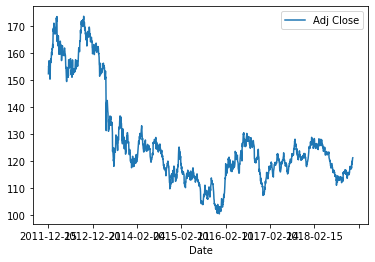

In [14]:
dclose.plot()

# **Using augmented Dickey-Fuller Test**

In [15]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(dclose['Adj Close'], autolag ='AIC')
print('1. ADF:\t',dftest[0])
print('2. p-Value:',dftest[1])
print('3. Num lags:',dftest[2])
print('4. Num of observations used for ADF Regression and Critical values calculation:',dftest[3])
print('5. Critical Values:',dftest[4])
for key, val in dftest[4].items():
  print('\t',key,':',val)

1. ADF:	 -1.8234601291067782
2. p-Value: 0.3688781538232954
3. Num lags: 1
4. Num of observations used for ADF Regression and Critical values calculation: 1716
5. Critical Values: {'1%': -3.434166497101742, '5%': -2.8632257697922383, '10%': -2.5676674574279645}
	 1% : -3.434166497101742
	 5% : -2.8632257697922383
	 10% : -2.5676674574279645


In [16]:
for key, value in dftest[4].items():
    print('\t%s: %.3f' % (key, value))
if dftest[0] < dftest[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

	1%: -3.434
	5%: -2.863
	10%: -2.568
Failed to Reject Ho - Time Series is Non-Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


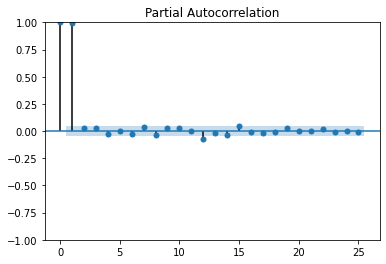

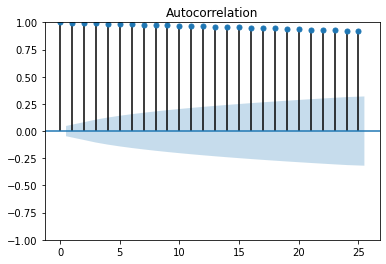

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf = plot_pacf(dclose['Adj Close'],lags =25)
acf = plot_acf(dclose['Adj Close'], lags =25)

In [18]:
train = X[:len(X)-7]
test = X[len(X)-7:]

In [19]:
modelAR = AutoReg(train, lags=13).fit()

In [20]:
print(modelAR.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 1711
Model:                    AutoReg(13)   Log Likelihood               -2774.047
Method:               Conditional MLE   S.D. of innovations              1.240
Date:                Sat, 08 Oct 2022   AIC                           5578.094
Time:                        14:51:50   BIC                           5659.652
Sample:                            13   HQIC                          5608.289
                                 1711                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3918      0.222      1.766      0.077      -0.043       0.827
y.L1           0.9327      0.024     38.444      0.000       0.885       0.980
y.L2           0.0324      0.033      0.977      0.3

In [21]:
pred = modelAR.predict(start=len(train), end = len(X)-1,dynamic = False)

[117.46881596 117.50202546 117.57485216 117.5328967  117.53082418
 117.60233097 117.55939032] [[119.239998]
 [118.720001]
 [120.019997]
 [119.660004]
 [120.57    ]
 [121.059998]
 [121.25    ]]


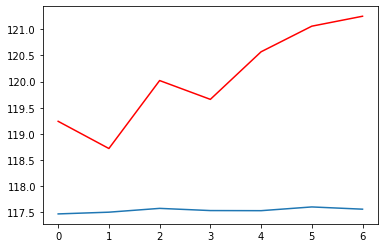

In [22]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(test, color = 'red')

test_pred = [test, pred]
print(pred,test)

In [23]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test,pred))
print(rmse)

2.6709152974244237


# **Making future predictions**

In [24]:
pred_future = modelAR.predict(start=len(X)+1, end=len(X)+7, dynamic = False)
print("The future predictons for the next week:\n")
print(pred_future)

The future predictons for the next week:

[117.57523244 117.61036553 117.59316197 117.59125862 117.60490336
 117.61643264 117.61950688]


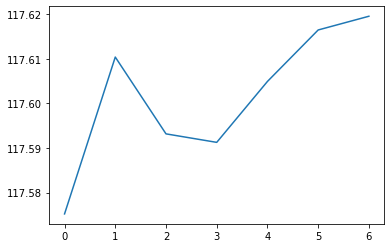

In [25]:
pyplot.plot(pred_future)

# **Using ARIMA model**

# Figure out order of our ARIMA model

In [26]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [28]:
stepwise_fit = auto_arima(dclose['Adj Close'], trace =True,aupress_warnings = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5656.173, Time=1.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5656.200, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5651.960, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5651.565, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5654.558, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5652.699, Time=1.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5652.291, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5649.496, Time=1.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5656.042, Time=0.61 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=5654.048, Time=0.40 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5649.639, Time=1.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5653.438, Time=2.24 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5647.921, Time=0.47 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5650.731, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]          

In [29]:
print(stepwise_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1718
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -2819.961
Date:                Sat, 08 Oct 2022   AIC                           5647.921
Time:                        14:52:10   BIC                           5669.715
Sample:                             0   HQIC                          5655.985
                               - 1718                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8880      0.076    -11.671      0.000      -1.037      -0.739
ma.L1          0.8289      0.074     11.163      0.000       0.683       0.974
ma.L2         -0.0815      0.011     -7.501      0.0

In [30]:
from statsmodels.tsa.arima.model import ARIMA

**Split dataset into trainng and testing**

In [31]:
print(dclose.shape)
trainMA= dclose.iloc[:-28]
testMA= dclose.iloc[-28:]
print(trainMA.shape,testMA.shape)

(1718, 1)
(1690, 1) (28, 1)


**Train the model**

In [32]:
model = ARIMA(trainMA['Adj Close'], order = (1,1,2))
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1690
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2784.380
Date:                Sat, 08 Oct 2022   AIC                           5576.759
Time:                        14:52:10   BIC                           5598.487
Sample:                             0   HQIC                          5584.806
                               - 1690                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8864      0.078    -11.412      0.000      -1.039      -0.734
ma.L1          0.8281      0.076     10.923      0.000       0.680       0.977
ma.L2         -0.0810      0.011     -7.349      0.0

**Make predictions on test set**

In [33]:
start = len(trainMA)
end = len(trainMA)+ len(testMA)-1
pred = model.predict(start= start,end = end,type = 'levels')
pred.index = dclose.index[start:end+1]
print(pred)

Date
2018-11-19    115.585976
2018-11-20    115.544309
2018-11-21    115.581243
2018-11-23    115.548504
2018-11-26    115.577524
2018-11-27    115.551801
2018-11-28    115.574602
2018-11-29    115.554391
2018-11-30    115.572306
2018-12-03    115.556426
2018-12-04    115.570502
2018-12-06    115.558025
2018-12-07    115.569085
2018-12-10    115.559281
2018-12-11    115.567971
2018-12-12    115.560268
2018-12-13    115.567096
2018-12-14    115.561044
2018-12-17    115.566408
2018-12-18    115.561653
2018-12-19    115.565868
2018-12-20    115.562132
2018-12-21    115.565444
2018-12-24    115.562508
2018-12-26    115.565110
2018-12-27    115.562804
2018-12-28    115.564848
2018-12-31    115.563036
Name: predicted_mean, dtype: float64


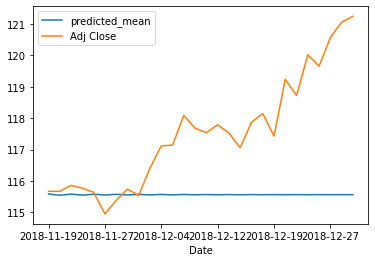

In [34]:
pred.plot(legend = True)
testMA['Adj Close'].plot(legend = 'True')

In [35]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(testMA,pred))
print(rmse)

2.6406220086313694


In [36]:
model2 = ARIMA(dclose['Adj Close'], order =(1,1,2))
model2 = model2.fit()
print(model2.summary())
dclose.tail()

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 1718
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -2819.961
Date:                Sat, 08 Oct 2022   AIC                           5647.921
Time:                        14:52:11   BIC                           5669.715
Sample:                             0   HQIC                          5655.985
                               - 1718                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8880      0.076    -11.671      0.000      -1.037      -0.739
ma.L1          0.8289      0.074     11.163      0.000       0.683       0.974
ma.L2         -0.0815      0.011     -7.501      0.0

,Adj Close
Date,
2018-12-24,120.019997
2018-12-26,119.660004
2018-12-27,120.570000
2018-12-28,121.059998
2018-12-31,121.250000


In [37]:
index_future = pd.date_range(start ='2018-12-31',end='2019-01-28')
pred2 = model2.predict(start =len(dclose),end=len(dclose)+28, typ = 'levels').rename('ARIMA Predictions')
pred2.index =index_future
print(pred2)

2018-12-31    121.310708
2019-01-01    121.230544
2019-01-02    121.301732
2019-01-03    121.238515
2019-01-04    121.294654
2019-01-05    121.244801
2019-01-06    121.289072
2019-01-07    121.249758
2019-01-08    121.284670
2019-01-09    121.253667
2019-01-10    121.281199
2019-01-11    121.256750
2019-01-12    121.278461
2019-01-13    121.259181
2019-01-14    121.276302
2019-01-15    121.261098
2019-01-16    121.274600
2019-01-17    121.262610
2019-01-18    121.273257
2019-01-19    121.263802
2019-01-20    121.272199
2019-01-21    121.264742
2019-01-22    121.271364
2019-01-23    121.265483
2019-01-24    121.270705
2019-01-25    121.266068
2019-01-26    121.270186
2019-01-27    121.266529
2019-01-28    121.269777
Freq: D, Name: ARIMA Predictions, dtype: float64


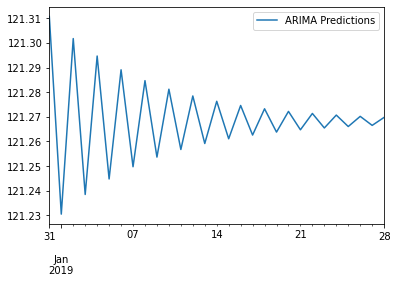

In [38]:
pred2.plot(legend = True)

# **Using machine learning model**

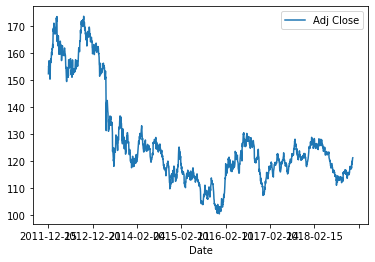

In [39]:
dclose.plot()

In [40]:
dclose['price_Day-1']=dclose['Adj Close'].shift(+1)
dclose['price_Day-2']=dclose['Adj Close'].shift(+2)
dclose['price_day-3']=dclose['Adj Close'].shift(+3)
dclose

,Adj Close,price_Day-1,price_Day-2,price_day-3
Date,,,,
2011-12-15,152.330002,NaN,NaN,NaN
2011-12-16,155.229996,152.330002,NaN,NaN
2011-12-19,154.869995,155.229996,152.330002,NaN
2011-12-20,156.979996,154.869995,155.229996,152.330002
2011-12-21,157.160004,156.979996,154.869995,155.229996
...,...,...,...,...
2018-12-24,120.019997,118.720001,119.239998,117.430000
2018-12-26,119.660004,120.019997,118.720001,119.239998
2018-12-27,120.570000,119.660004,120.019997,118.720001


In [41]:
dclose=dclose.dropna()
dclose

,Adj Close,price_Day-1,price_Day-2,price_day-3
Date,,,,
2011-12-20,156.979996,154.869995,155.229996,152.330002
2011-12-21,157.160004,156.979996,154.869995,155.229996
2011-12-22,156.039993,157.160004,156.979996,154.869995
2011-12-23,156.309998,156.039993,157.160004,156.979996
2011-12-27,154.910004,156.309998,156.039993,157.160004
...,...,...,...,...
2018-12-24,120.019997,118.720001,119.239998,117.430000
2018-12-26,119.660004,120.019997,118.720001,119.239998
2018-12-27,120.570000,119.660004,120.019997,118.720001


In [42]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [43]:
from sklearn.ensemble import RandomForestRegressor
modelRF=RandomForestRegressor(n_estimators=100,max_features=3, random_state=1)

In [44]:
import numpy as np
x1,x2,x3,y=dclose['price_Day-1'],dclose['price_Day-2'],dclose['price_day-3'],dclose['Adj Close']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[154.869995 155.229996 152.330002]
 [156.979996 154.869995 155.229996]
 [157.160004 156.979996 154.869995]
 ...
 [119.660004 120.019997 118.720001]
 [120.57     119.660004 120.019997]
 [121.059998 120.57     119.660004]]


In [45]:
X_train,X_test,y_train,y_test=final_x[:-30],final_x[-30:],y[:-30],y[-30:]

In [46]:
modelRF.fit(X_train,y_train)
lin_model.fit(X_train,y_train)

LinearRegression()

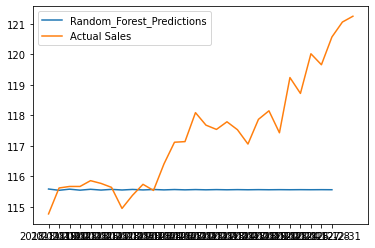

In [47]:
predRF=modelRF.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,4)
plt.plot(pred,label='Random_Forest_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()



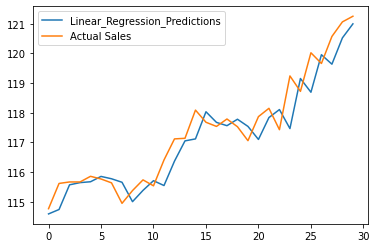

In [48]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,4)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual Sales')
plt.legend(loc="upper left")
plt.show()

In [90]:
dclose['Adj Close']

Date
2011-12-20    156.979996
2011-12-21    157.160004
2011-12-22    156.039993
2011-12-23    156.309998
2011-12-27    154.910004
                 ...    
2018-12-24    120.019997
2018-12-26    119.660004
2018-12-27    120.570000
2018-12-28    121.059998
2018-12-31    121.250000
Name: Adj Close, Length: 1715, dtype: float64

In [92]:
ma100 = dclose['Adj Close'].rolling(100).mean()
ma100

Date
2011-12-20         NaN
2011-12-21         NaN
2011-12-22         NaN
2011-12-23         NaN
2011-12-27         NaN
                ...   
2018-12-24    114.9545
2018-12-26    114.9912
2018-12-27    115.0455
2018-12-28    115.1109
2018-12-31    115.1742
Name: Adj Close, Length: 1715, dtype: float64

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-10-08 16:08:49.443 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-10-08 16:08:49.545 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are 

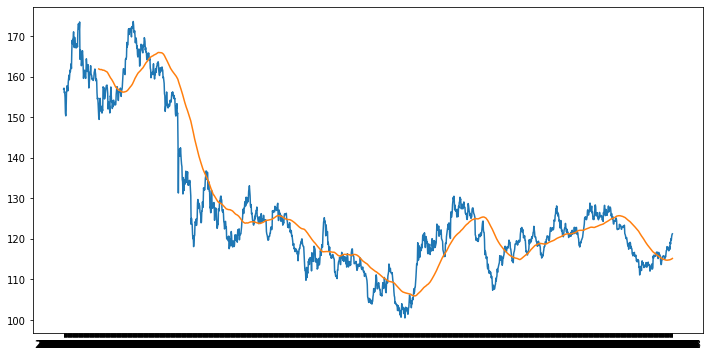

In [94]:
plt.figure(figsize=(12,6))
plt.plot(dclose['Adj Close'])
plt.plot(ma100)
plt.show()

In [95]:
ma200 = dclose['Adj Close'].rolling(200).mean()
ma200

Date
2011-12-20          NaN
2011-12-21          NaN
2011-12-22          NaN
2011-12-23          NaN
2011-12-27          NaN
                ...    
2018-12-24    118.88460
2018-12-26    118.85580
2018-12-27    118.83095
2018-12-28    118.80855
2018-12-31    118.78590
Name: Adj Close, Length: 1715, dtype: float64

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-10-08 16:10:19.464 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2022-10-08 16:10:19.566 INFO    matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are 

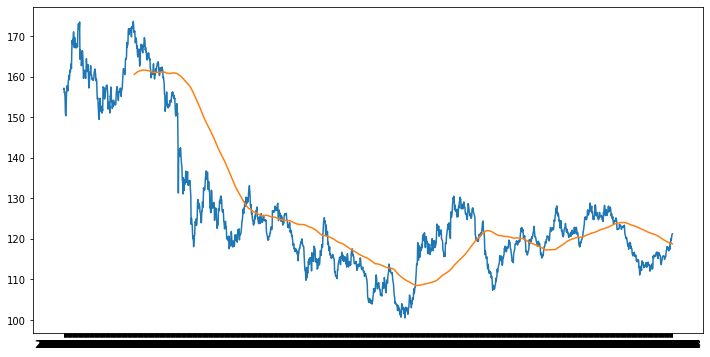

In [96]:
plt.figure(figsize=(12,6))
plt.plot(dclose['Adj Close'])
plt.plot(ma200)
plt.show()

In [74]:
import pickle

In [76]:
l_file = 'trained_model.sav'
pickle.dump(lin_model, open(l_file, 'wb'))

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_rf=sqrt(mean_squared_error(predRF,y_test))
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [50]:
print('Mean Squared Error for Random Forest Model is:',rmse_rf)
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Random Forest Model is: 0.9247853642328762
Mean Squared Error for Linear Regression Model is: 0.631557301746101


# **Multi Variate forecasting using VAR model**

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [52]:
goldp.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [53]:
df_multi = goldp[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]

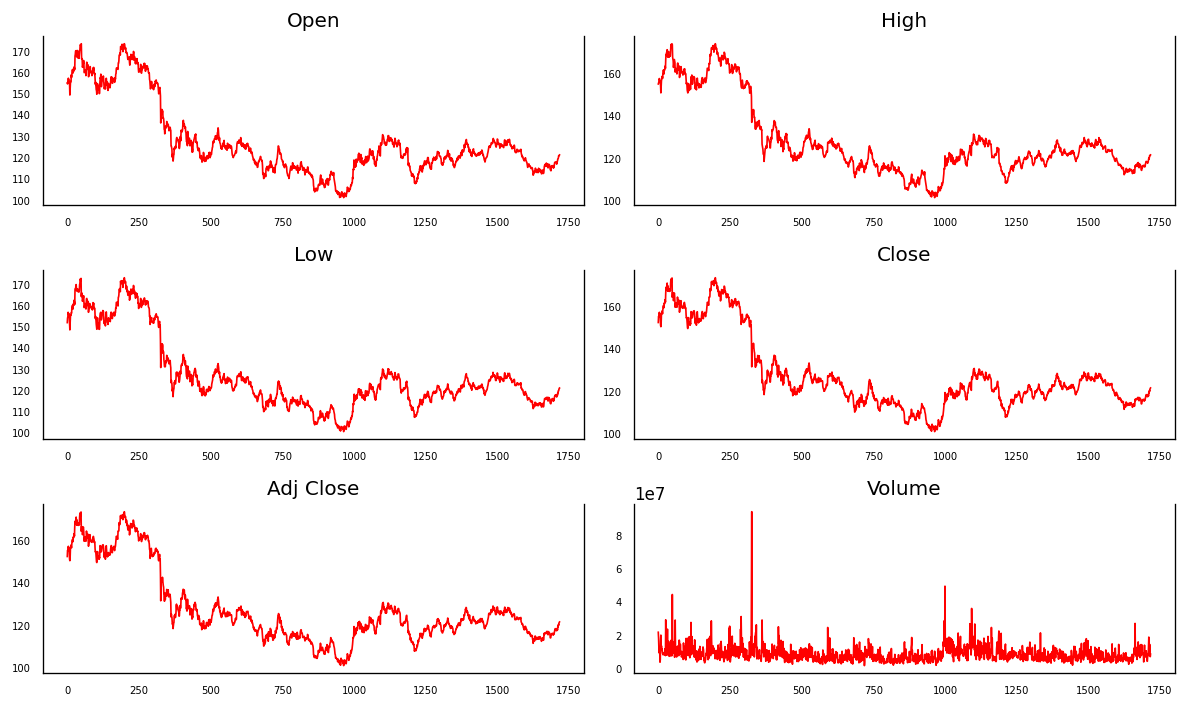

In [54]:
fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df_multi[df_multi.columns[i+1]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df_multi.columns[i+1])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [55]:
ad_fuller_result_1 = adfuller(df_multi['Open'])#.diff()[1:])

print('Open')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df_multi['High'])#.diff()[1:])

print('High')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

ad_fuller_result_3= adfuller(df_multi['Low'])#.diff()[1:])

print('Low')
print(f'ADF Statistic: {ad_fuller_result_3[0]}')
print(f'p-value: {ad_fuller_result_3[1]}')

print('\n---------------------\n')

ad_fuller_result_4 = adfuller(df_multi['Close'])#.diff()[1:])

print('Close')
print(f'ADF Statistic: {ad_fuller_result_4[0]}')
print(f'p-value: {ad_fuller_result_4[1]}')

ad_fuller_result_5 = adfuller(df_multi['Adj Close'])#.diff()[1:])

print('Adj Close')
print(f'ADF Statistic: {ad_fuller_result_5[0]}')
print(f'p-value: {ad_fuller_result_5[1]}')

print('\n---------------------\n')

ad_fuller_result_6 = adfuller(df_multi['Volume'])#.diff()[1:])

print('Volume')
print(f'ADF Statistic: {ad_fuller_result_6[0]}')
print(f'p-value: {ad_fuller_result_6[1]}')

Open
ADF Statistic: -1.8463008423644875
p-value: 0.35772875583369135

---------------------

High
ADF Statistic: -1.7801526424376253
p-value: 0.390358918360314
Low
ADF Statistic: -1.8089020844046304
p-value: 0.3760510982793282

---------------------

Close
ADF Statistic: -1.8234601291067782
p-value: 0.3688781538232954
Adj Close
ADF Statistic: -1.8234601291067782
p-value: 0.3688781538232954

---------------------

Volume
ADF Statistic: -6.371130588592106
p-value: 2.3436140451806365e-08


**Shows that my data is not stationary and we need to convert it into stationary? We are going to use simle differencing to make it stationary**

In [56]:
ad_fuller_result_1 = adfuller(df_multi['Open'].diff()[1:])

print('Open')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df_multi['High'].diff()[1:])

print('High')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

ad_fuller_result_3= adfuller(df_multi['Low'].diff()[1:])

print('Low')
print(f'ADF Statistic: {ad_fuller_result_3[0]}')
print(f'p-value: {ad_fuller_result_3[1]}')

print('\n---------------------\n')

ad_fuller_result_4 = adfuller(df_multi['Close'].diff()[1:])

print('Close')
print(f'ADF Statistic: {ad_fuller_result_4[0]}')
print(f'p-value: {ad_fuller_result_4[1]}')

ad_fuller_result_5 = adfuller(df_multi['Adj Close'].diff()[1:])

print('Adj Close')
print(f'ADF Statistic: {ad_fuller_result_5[0]}')
print(f'p-value: {ad_fuller_result_5[1]}')

print('\n---------------------\n')

ad_fuller_result_6 = adfuller(df_multi['Volume'].diff()[1:])

print('Volume')
print(f'ADF Statistic: {ad_fuller_result_6[0]}')
print(f'p-value: {ad_fuller_result_6[1]}')

Open
ADF Statistic: -30.749057493223155
p-value: 0.0

---------------------

High
ADF Statistic: -41.897281886634616
p-value: 0.0
Low
ADF Statistic: -30.9963750935614
p-value: 0.0

---------------------

Close
ADF Statistic: -31.12395376252256
p-value: 0.0
Adj Close
ADF Statistic: -31.12395376252256
p-value: 0.0

---------------------

Volume
ADF Statistic: -13.368271371338986
p-value: 5.259970441249103e-25


**Since p-value becomes less than 0.5 now the times series are stationary**

Now we need to check if the times serieses are correlated. To Check that we are going to perform Granger causalatiy test

In [57]:
df_multi.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [58]:
print('Open causes Adj Close?\n')
print('------------------')
granger_1 = grangercausalitytests(df_multi[['Adj Close', 'Open']], 5)# does second column casuses first column

print('\High causes Adj Close?\n')
print('------------------')
granger_2 = grangercausalitytests(df_multi[['Adj Close', 'High']], 5) # 4 signifies we are checking for 4 lags

print('Low causes Adj Close?\n')
print('------------------')
granger_3 = grangercausalitytests(df_multi[['Adj Close', 'Low']], 5)

print('\n Close causes Adj Close?\n')
print('------------------')
granger_4 = grangercausalitytests(df_multi[['Adj Close', 'Close']], 5)

print('Adj Close causes Adj Close?\n')
print('------------------')
granger_5 = grangercausalitytests(df_multi[['Adj Close', 'Adj Close']], 5)

print('\n Volume causes Adj Close?\n')
print('------------------')
granger_6 = grangercausalitytests(df_multi[['Adj Close', 'Volume']], 5)

Open causes Adj Close?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4737  , p=0.1160  , df_denom=1714, df_num=1
ssr based chi2 test:   chi2=2.4780  , p=0.1154  , df=1
likelihood ratio test: chi2=2.4762  , p=0.1156  , df=1
parameter F test:         F=2.4737  , p=0.1160  , df_denom=1714, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2330  , p=0.7922  , df_denom=1711, df_num=2
ssr based chi2 test:   chi2=0.4673  , p=0.7917  , df=2
likelihood ratio test: chi2=0.4672  , p=0.7917  , df=2
parameter F test:         F=0.2330  , p=0.7922  , df_denom=1711, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2277  , p=0.8772  , df_denom=1708, df_num=3
ssr based chi2 test:   chi2=0.6859  , p=0.8765  , df=3
likelihood ratio test: chi2=0.6857  , p=0.8766  , df=3
parameter F test:         F=0.2277  , p=0.8772  , df_denom=1708, df_num=3

Granger Causality
number of lags (no zero) 4

In [59]:
print('Adj Close causes Open?\n')
print('------------------')
granger1_1 = grangercausalitytests(df_multi[['Open','Adj Close']], 5)# does second column casuses first column

print('\Adj Close causes High?\n')
print('------------------')
granger2_2 = grangercausalitytests(df_multi[['High','Adj Close']], 5) # 4 signifies we are checking for 4 lags

print('Adj Close causes Low?\n')
print('------------------')
granger3_3 = grangercausalitytests(df_multi[['Low','Adj Close']], 5)

print('\n Adj Close causes Close?\n')
print('------------------')
granger4_4 = grangercausalitytests(df_multi[['Close','Adj Close']], 5)

print('Adj Close causes Adj Close?\n')
print('------------------')
granger5_5 = grangercausalitytests(df_multi[['Adj Close','Adj Close']], 5)

print('\n Adj Close causes Volume?\n')
print('------------------')
granger6_6 = grangercausalitytests(df_multi[['Volume','Adj Close']], 5)

Adj Close causes Open?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1203.8041, p=0.0000  , df_denom=1714, df_num=1
ssr based chi2 test:   chi2=1205.9111, p=0.0000  , df=1
likelihood ratio test: chi2=913.4466, p=0.0000  , df=1
parameter F test:         F=1203.8041, p=0.0000  , df_denom=1714, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=612.8127, p=0.0000  , df_denom=1711, df_num=2
ssr based chi2 test:   chi2=1229.2069, p=0.0000  , df=2
likelihood ratio test: chi2=926.9542, p=0.0000  , df=2
parameter F test:         F=612.8127, p=0.0000  , df_denom=1711, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=407.3264, p=0.0000  , df_denom=1708, df_num=3
ssr based chi2 test:   chi2=1226.9874, p=0.0000  , df=3
likelihood ratio test: chi2=925.5379, p=0.0000  , df=3
parameter F test:         F=407.3264, p=0.0000  , df_denom=1708, df_num=3

Granger Causality
number of lags (no ze

**From the above two code cells results we see that if our target variable is Adj close then only volume affects our target with all the lags till first 3 lags**

In [60]:
df_multi1 = df_multi[['Adj Close','Volume']]
print(df_multi1.shape)

(1718, 2)


**Splitting the data**

In [61]:
train_df=df_multi1[:-14]
test_df=df_multi1[-14:]

In [62]:
print(test_df.shape)

(14, 2)


In [63]:
model = VAR(train_df.diff()[1:]) # suppllying the differencing data

In [64]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        31.39       31.40   4.288e+13       31.39
1        31.24       31.26   3.708e+13       31.25
2        31.13       31.16   3.301e+13       31.14
3        31.11       31.16   3.244e+13       31.13
4        31.08       31.14   3.140e+13       31.10
5        31.05      31.12*   3.039e+13       31.07
6        31.04       31.12   3.016e+13       31.07
7        31.02       31.12   2.978e+13      31.06*
8        31.02       31.13   2.969e+13       31.06
9        31.02       31.14   2.954e+13       31.06
10       31.02       31.15   2.957e+13       31.07
11       31.02       31.17   2.964e+13       31.08
12       31.02       31.18   2.955e+13       31.08
13      31.01*       31.18  2.933e+13*       31.07
14       31.01       31.20   2.942e+13       31.08
15       31.01       31.21   2.934e+13       31.08
16       31.01       31.22   2.

Minimum lag is found at lag number 13,but we dont have enough data to go till lag 13 thats why we have found that lag number 7 has almost similar value to lag number 13 and thats what we will be using to build our model

In [65]:
var_model = VARMAX(train_df, order=(7,0),enforce_stationarity= True) # since we are not going to use moving avereage part so in order second part is 0
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                              Statespace Model Results                             
Dep. Variable:     ['Adj Close', 'Volume']   No. Observations:                 1704
Model:                              VAR(7)   Log Likelihood              -31210.591
                               + intercept   AIC                          62487.182
Date:                     Sat, 08 Oct 2022   BIC                          62666.726
Time:                             14:52:41   HQIC                         62553.642
Sample:                                  0                                         
                                    - 1704                                         
Covariance Type:                       opg                                         
Ljung-Box (L1) (Q):             0.03, 0.01   Jarque-Bera (JB):    9058.64, 87966.04
Prob(Q):                        0.86, 0.91   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         0.23, 0.35   Skew:                      -0.7

In [66]:
n_forecast = 14
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="1989-07-01",end='1999-01-01')

predictions=predict.predicted_mean

In [67]:
#index_future = pd.date_range(start ='2018-12-01',end='2019-01-14')
predictions.columns=['Adj Close pred','Volume pred']
#predictions.index =index_future
print(predictions)

      Adj Close pred   Volume pred
1704      117.777392  8.399760e+06
1705      117.842248  8.545058e+06
1706      117.839029  8.369886e+06
1707      117.865999  8.468286e+06
1708      117.874257  8.510646e+06
1709      117.947328  8.066900e+06
1710      117.978466  8.085170e+06
1711      118.007069  8.087957e+06
1712      118.040262  7.999747e+06
1713      118.067365  8.000527e+06
1714      118.103577  7.985033e+06
1715      118.134689  7.934274e+06
1716      118.163282  7.914599e+06
1717      118.192972  7.900759e+06


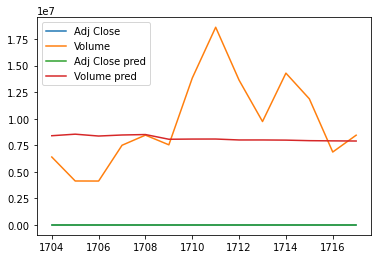

In [68]:
test_vs_pred=pd.concat([test_df,predictions],axis=1)
test_vs_pred.plot(figsize=(6,4))

In [69]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_adj_cls=math.sqrt(mean_squared_error(predictions['Adj Close pred'],test_df['Adj Close']))
print('Mean value of Adj Close is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Adj Close']),rmse_adj_cls))

rmse_vol=math.sqrt(mean_squared_error(predictions['Volume pred'],test_df['Volume']))
print('Mean value of Volume is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['Volume']),rmse_vol))

Mean value of Adj Close is : 118.84928585714286. Root Mean Squared Error is :1.536011906221054
Mean value of Volume is : 9675307.142857144. Root Mean Squared Error is :4454965.373432027


In [70]:
!pip install pipreqs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=2e0e4381e69b4f1aa55c96e5acec4f84acea989d236a60247cda106ee87d0388
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


In [71]:
!pipreqs ./

INFO: Successfully saved requirements file in ./requirements.txt


In [72]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.2 MB 5.1 MB/s 
     |████████████████████████████████| 164 kB 69.9 MB/s 
     |████████████████████████████████| 78 kB 6.3 MB/s 
     |████████████████████████████████| 237 kB 61.3 MB/s 
     |████████████████████████████████| 182 kB 56.5 MB/s 
     |████████████████████████████████| 4.7 MB 39.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 51 kB 6.1 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=3c8daef0c430c05b91ece9ed8f2cf4d7ec870e192217369c7b996f48d81b1201
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [77]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [82]:
import streamlit as st


In [86]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/trained_model.sav')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Time Series
         """
         )

user_input = st.text_input('Select dataset',)

Overwriting app.py


In [87]:
!streamlit run app.py & npx localtunnel --port 8501

2022-10-08 15:45:37.086 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
[..................] / fetchMetadata: sill resolveWithNewModule localtunnel@2.0

npx: installed 22 in 4.822s
your url is: https://upset-hornets-chew-34-67-91-116.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.67.91.116:8501

2022-10-08 15:48:20.882 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 562, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 11, in <module>
    model=load_model()
  File "/usr/local/lib/python3.7/dist-packages/streamlit/runtime/legacy_caching/caching.py", line 621, in wrapped_func
    return get_or_create_cached_value()
  File "/usr/local/lib/python3.7/dist-packages/streamlit/runtime/legacy_caching/caching.py", line 605, in get_or_create_cached_value
    return_valu